In [1]:
import data, model, loss, function
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

%load_ext autoreload
%autoreload 2

In [17]:
def show_images(epoch, iteration):
    content_batch = torch.load("./output/{}_{}_content.pt".format(epoch, iteration))
    style_batch = torch.load("./output/{}_{}_style.pt".format(epoch, iteration))
    reconstruction_batch = torch.load("./output/{}_{}_reconstruction.pt".format(epoch, iteration))
    
    content_batch = data.vgg_normalization_undo(content_batch.numpy())
    style_batch = data.vgg_normalization_undo(style_batch.numpy())
    reconstruction_batch = data.vgg_normalization_undo(reconstruction_batch.numpy())
    
    content_batch = np.transpose(content_batch, (0, 2, 3, 1))
    style_batch = np.transpose(style_batch, (0, 2, 3, 1))
    reconstruction_batch = np.transpose(reconstruction_batch, (0, 2, 3, 1))
    
    fig = plt.figure(figsize=(21, 7))
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(content_batch[0])
    
    fig.add_subplot(1, 3, 2)
    plt.imshow(style_batch[0])
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(reconstruction_batch[0])
    
    plt.savefig("./output/test.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


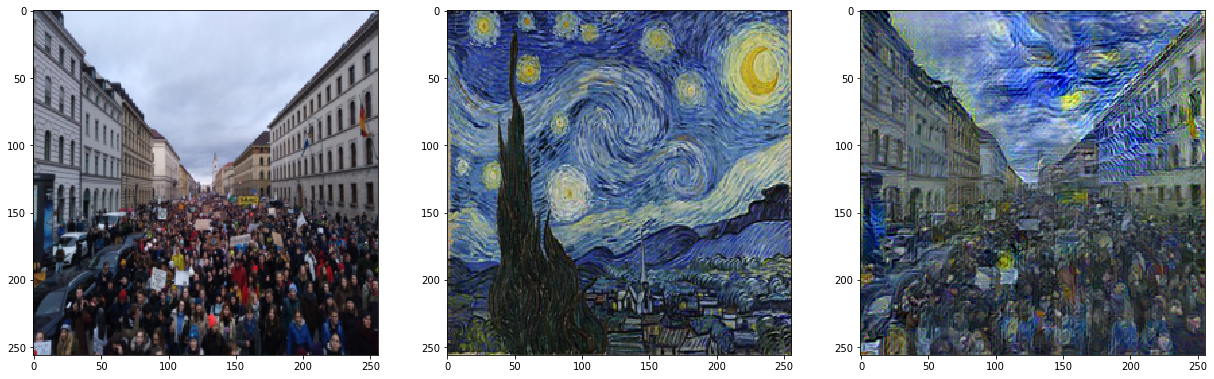

In [167]:
show_images(3001, 1)

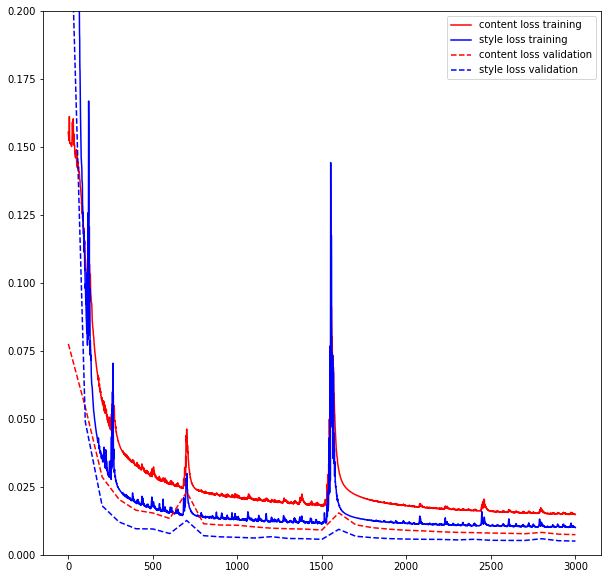

In [168]:
content_loss_history_train = torch.load("output/content_loss_history_train.pt")
style_loss_history_train = torch.load("output/style_loss_history_train.pt")
content_loss_history_val = torch.load("output/content_loss_history_val.pt")
style_loss_history_val = torch.load("output/style_loss_history_val.pt")

fig = plt.figure(figsize=(10, 10))

plt.plot(content_loss_history_train, "r", label="content loss training")
plt.plot(style_loss_history_train, "b", label="style loss training")
plt.plot(*zip(*content_loss_history_val), "r--", label="content loss validation")
plt.plot(*zip(*style_loss_history_val), "b--", label="style loss validation")

plt.ylim(0, 0.2)
plt.legend()

plt.savefig("./output/loss.pdf")